In [1]:
import numpy as np
import matplotlib.pylab as plt
import sympy as sy
import pandas as pd
from scipy import integrate
from scipy import optimize

I) The period of a pendulum of length l oscillating at a large angle $\alpha$ is given by
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha) ^\frac{1}{2}}
$$
where
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
is the period of the same pendulum at small amplitudes. Any numerical evaluation of the integral as is would fail (explain why). If we change the variable by writing:
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
we can get:
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
which is a well-behaved integral. Write a program to use the above integral to calculate the ratio $T/T_0$ for integral amplitudes $0^\circ \le\alpha \le 90^\circ$. Output these values as a pandas dataframe showing the amplitude in degrees and radians as well as $T/T_0$, and make a plot with the two columns. Explain the result when $\alpha = 0.$ 

In [152]:
# intervalo de integración

ϕ1=0
ϕf=np.pi/2 

# defino la función
c = 2/np.pi
#a = α*np.pi/180*2



Sifloat = lambda α : integrate.quad(lambda ϕ:c*(1/(1-(np.sin(α)**2*np.sin(ϕ)**2))**0.5),ϕ1,ϕf)[0]

def I(α):# defino la función para evaluar el array de alpha 
    try:
        nn=np.array(α).shape[0]
        f=np.vectorize(Sifloat)
    except IndexError:
        f=Sifloat
    return f(α)

In [155]:
α = np.deg2rad(np.linspace(0,90)) # tomo un intervalo punto para evaluar en la función definida anteriormente
I = I(α)# Evalúo la función en el intervalo


/home/asus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/home/asus/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


In [153]:
αg = np.linspace(0,90) # en grados 
I1 = I(αg)

In [158]:
df = pd.DataFrame({'αrad':α,'αgrad':αg,'Amplitud_rad':I,'Amplitud_grad':I1})# creo dataframe para los radianes 
df

,αrad,αgrad,Amplitud_rad,Amplitud_grad
0,0.000000,0.000000,1.000000,1.000000
1,0.032057,1.836735,1.000257,1.752895
2,0.064114,3.673469,1.001029,1.075679
3,0.096171,5.510204,1.002317,1.173734
4,0.128228,7.346939,1.004126,1.389587
5,0.160285,9.183673,1.006461,1.014729
6,0.192342,11.020408,1.009328,3.235667
7,0.224399,12.857143,1.012736,1.021556
8,0.256457,14.693878,1.016695,1.341495
9,0.288514,16.530612,1.021216,1.201275


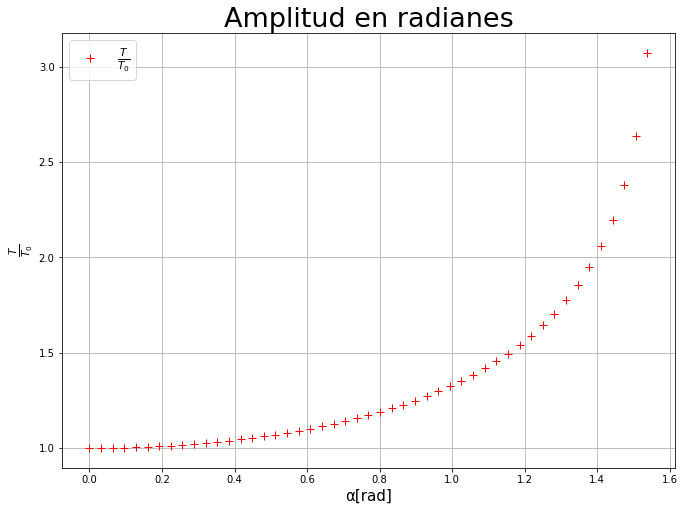

In [160]:
plt.figure(figsize = (11,8))
plt.plot(df.αrad,df.Amplitud_rad,'r+',ms=8,label= r'$\frac{T}{T_0}$')
plt.title('Amplitud en radianes',fontsize = 27)
plt.xlabel('α[rad]',fontsize = 15)
plt.ylabel(r'$\frac{T}{T_0}$',fontsize = 15)
plt.grid()
plt.legend(fontsize=15)

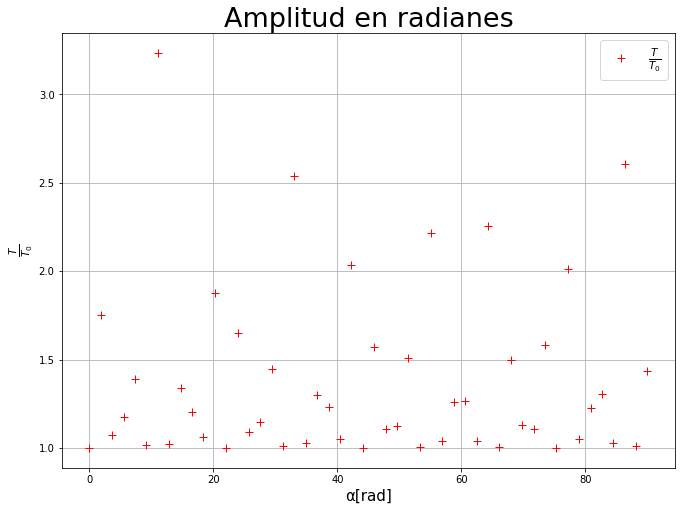

In [161]:
plt.figure(figsize = (11,8))
plt.plot(df.αgrad,df.Amplitud_grad,'r+',ms=8,label= r'$\frac{T}{T_0}$')
plt.title('Amplitud en grados',fontsize = 27)
plt.xlabel('α[rad]',fontsize = 15)
plt.ylabel(r'$\frac{T}{T_0}$',fontsize = 15)
plt.grid()
plt.legend(fontsize=15)

II) 
### Casas-Ibarra parameterization
Consider a $n\times n$ symmetric matrix $A$. We can assumme without lost of generality that this can be generated from a matrix $Y$ such that
$$
A=Y^{\operatorname{T}}Y
$$
Theorem 1 gurantees that exists an ortogonal matrix $U$ such that
$$
U^{\operatorname{T}} A U=U^{\operatorname{T}} Y^{\operatorname{T}}Y U=D_\lambda
$$
where
$$
D_{\lambda}=A_{\text{diag}}=\operatorname{diag}\left(\lambda_1,\lambda_2,\ldots,\lambda_n\right)
$$
where $\lambda_i$ are the eigenvalues of $A$. Therefore
\begin{align}
 Y^{\operatorname{T}}Y =&U D_\lambda U^{\operatorname{T}}\\
 =&U D_{\sqrt{\lambda}} D_{\sqrt{\lambda}} U^{\operatorname{T}}\\
\end{align}
where
$$
D_{\sqrt{\lambda}}=\operatorname{diag}\left(\sqrt{\lambda_1},\sqrt{\lambda_2},\ldots \sqrt{\lambda_n}\right)
$$
Therefore, exists an ortogonal arbitrary matrix $R$, such that
$$
 Y^{\operatorname{T}}Y =U D_{\sqrt{\lambda}}R^{\operatorname{T}}R D_{\sqrt{\lambda}} U^{\operatorname{T}}\\
$$

In this way, the matrix $Y$ can be parameterized in terms of $R$ as
$$
Y=R D_{\sqrt{\lambda}} U^{\operatorname{T}}
$$
1) By using the previous equations, build a matrix $Y$ $2\times 2$ with the following conditions
* $R$ is an orthogonal matrix with a mixing angle as a random number between $(0,2\pi)$. Use your identification number as the seed of the random number generator.
* The eigenvalues are $\lambda_1=2$ and $\lambda_2=4$. 
* $U$ is a diagonalization matrix with mixing angle $\pi/4$

2) Build the matrix $A$ and check that has the proper eigenvalues and eigenvectors

# Punto 1 

In [80]:
# genero el numero aleatorio
np.random.seed(101713934)
P =np.random.uniform(0.2*np.pi) # numero aleatorio entre 0 y  2pi


θ = np.pi/4 # Angulo sugerido


#### escribamos las matrices tomando los valores propios dados 2 y 4 
Md = np.sqrt(np.diag([2,4])) # matriz diagonal definida con raiz del autovalor
U  = np.array([[np.cos(θ),-np.sin(θ)],[np.sin(θ),np.cos(θ)]]) # matriz de mixing angle o rotacion
R  = np.array([[np.cos(P),-np.sin(P)],[np.sin(P),np.cos(P)]]) # matriz de mixing angle o rotacion
Ut = np.transpose(U)#b matriz traspuesta 

### multiplicamos las matrices y encontramos Y y Y traspuesta

Y  = np.dot(R,np.dot(Md,Ut))
Yt = np.transpose(Y)


## Punto 2 

In [71]:
### claculamos A 
A = np.dot(Yt,Y)
A # encontramos A

array([[ 3., -1.],
       [-1.,  3.]])

In [75]:
def argeig(A):
  l,V = np.linalg.eig(A)# utilizó la implementación de numpy para tener los autovalores y los autovectores
  contador = np.abs(l).argsort()# veo el numero de los autovalores en orden creciente 
  argl = np.sort(l)# organizó los autovalores en forma acendente 
  argV = np.c_[ tuple( [ np.c_[V[:,i]]    for i in contador ] ) ]# generó la matriz con los autovectores en el orden correspondiente   

  return argl, argV # me retorna los arreglos 


In [79]:
λ,V = argeig(A) # definimos los vertores de manera organizada 

#calculemos la matriz A apartir de los autovectores y autovalores 

A1 = np.dot(V,np.dot(np.diag(λ),np.transpose(V)))
A1

array([[ 3., -1.],
       [-1.,  3.]])

Por lo tanto A1 = A 